,new
date,
2020-02-27,NaN
2020-02-28,0.0
2020-02-29,4.0
2020-03-01,1.0
2020-03-02,3.0
...,...
2020-10-23,651.0
2020-10-24,706.0
2020-10-25,1056.0


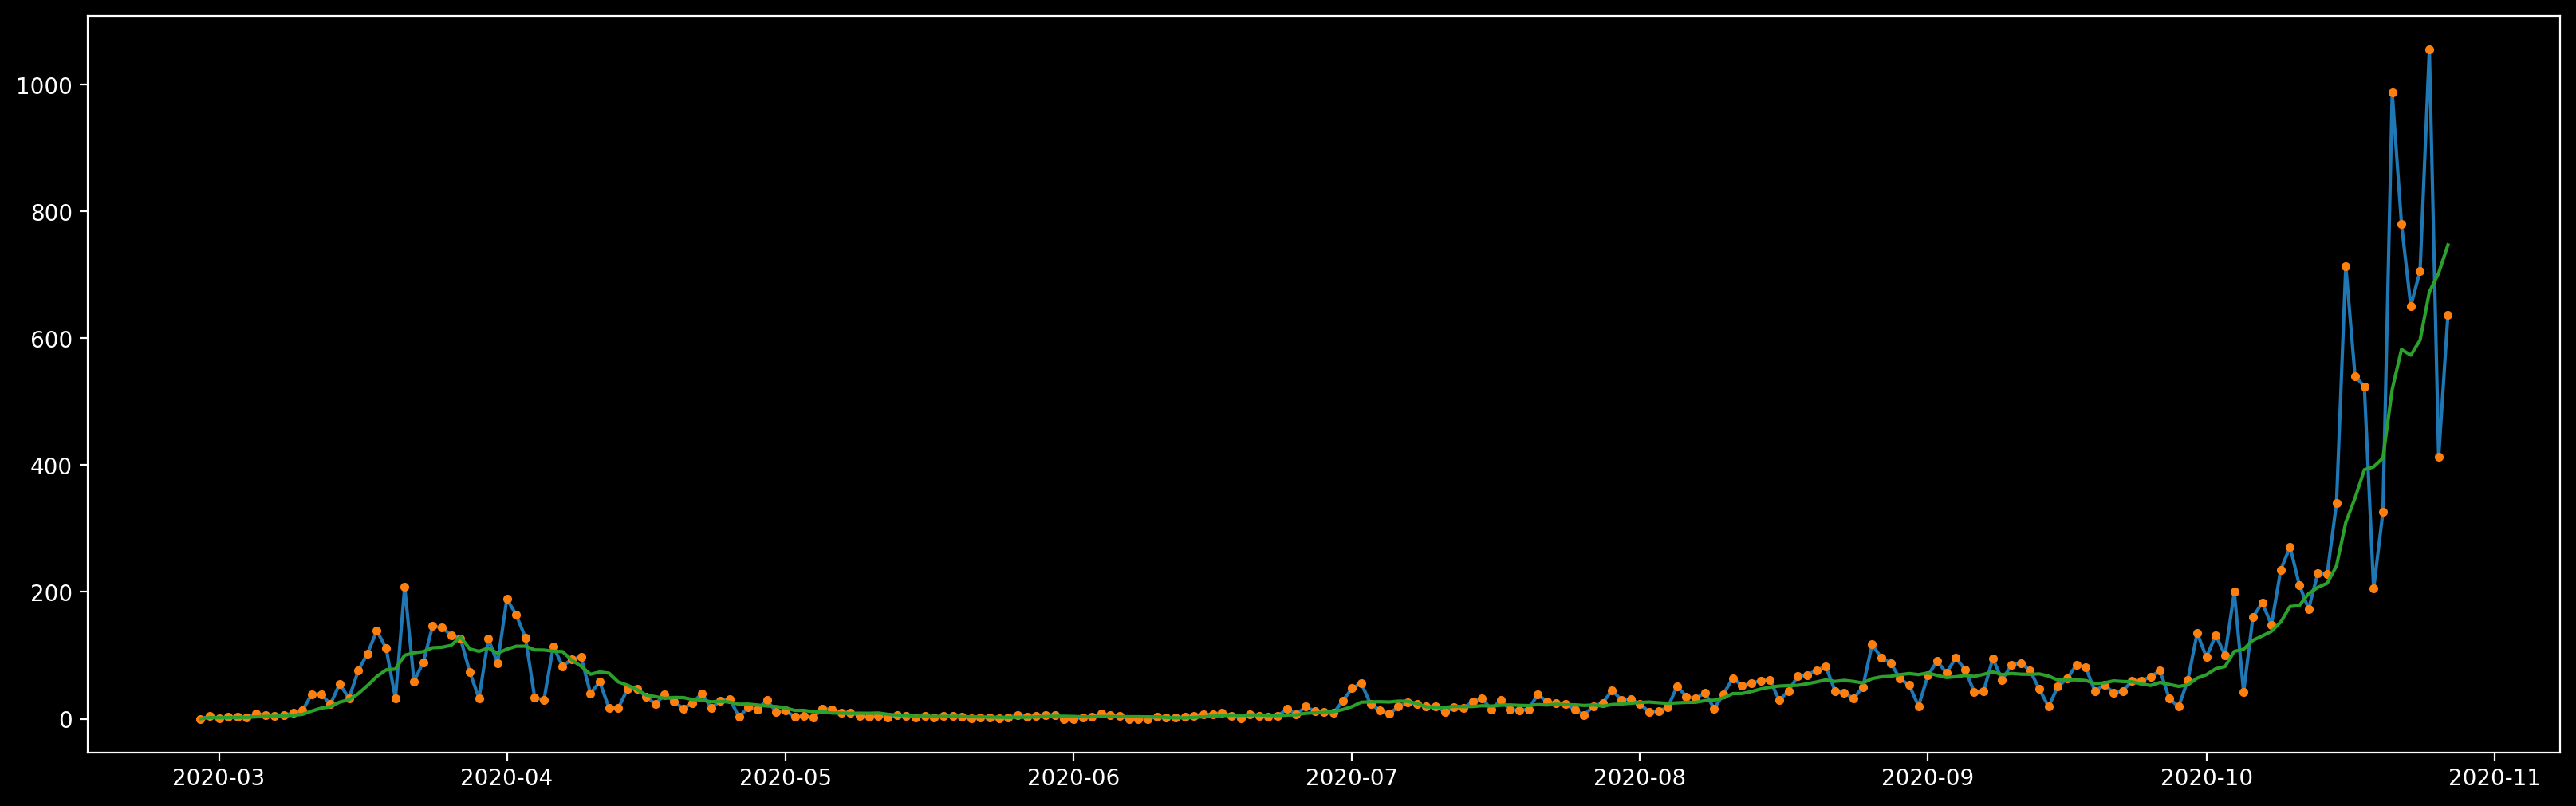

In [1]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,6)

url = 'https://raw.githubusercontent.com/openZH/covid_19/master/fallzahlen_kanton_total_csv_v2/COVID19_Fallzahlen_Kanton_ZH_total.csv'
df = pd.read_csv(url, error_bad_lines = False, header=0, index_col=0, parse_dates=True, squeeze=True)
df.insert(3, "new", df['ncumul_conf']-df.shift(periods=1)['ncumul_conf'], True) 
cols = [3]
df2 = df[df.columns[cols]]
plt.plot(df2)
plt.plot(df2,'.')

ma = df2.rolling('7d').mean()
plt.plot(ma,'-')
display(df2)
pyplot.show()



